Ce notebook compare les différents algorithmes utilisés pour l'entrainement du jeu Taxi Driver (v3).

Le jeu a été résolu avec les méthodes suivantes :
* Q Learning
* SARSA
* Brute Force

Le benchmark compare les données suivantes, issues des phases de tests, pour chacune des méthodes précitées :
* Récompenses
* Pénalités
* Nombre de pas pour résoudre une partie
* Taux de réussite sur l'ensemble des parties

## Chargement des données

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Chargement des données

In [2]:
class DataResults:
    def __init__(self, episodes, penalties, rewards, steps, solved):
        self.episodes = episodes
        self.penalties = penalties
        self.rewards = rewards
        self.steps = steps
        self.solved = solved

def load_data(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
        
    episodes = data.total_attempts
    penalties = [data.results[i].penalties for i in range(episodes)]
    rewards = [data.results[i].rewards for i in range(episodes)]
    steps = [data.results[i].epochs for i in range(episodes)]
    solved = [data.results[i].solved for i in range(episodes)]
    
    return DataResults(episodes, penalties, rewards, steps, solved)

In [3]:
dataSarsa = load_data('Sarsa/batch_result.pkl')
dataQl = load_data('Q_Learning/batch_result.pkl')
dataBf = load_data('Bruteforce/batch_result.pkl')

## Calcul des données d'analyses

In [4]:
MEAN_EVERY_N_EPISODES = 50

def meanInterval(data):
    meanInterval = []
    for i in range(0, len(data), MEAN_EVERY_N_EPISODES):
        meanInterval.append(np.mean(data[i:i+100]))
    return meanInterval

# Moyenne des rewards
meanRewardsSarsa = meanInterval(dataSarsa.rewards)
meanRewardsQl = meanInterval(dataQl.rewards)
meanRewardsBf = meanInterval(dataBf.rewards)

# Moyenne des pénalités
meanPenaltiesSarsa = meanInterval(dataSarsa.penalties)
meanPenaltiesQl = meanInterval(dataQl.penalties)
meanPenaltiesBf = meanInterval(dataBf.penalties)

# Moyenne des steps
meanStepsSarsa = meanInterval(dataSarsa.steps)
meanStepsQl = meanInterval(dataQl.steps)
meanStepsBf = meanInterval(dataBf.steps)

# Taux de réussite (solved)
solvedRateSarsa = dataSarsa.solved.count(True) / dataSarsa.episodes
solvedRateQl = dataQl.solved.count(True) / dataQl.episodes
solvedRateBf = dataBf.solved.count(True) / dataBf.episodes

## Graphiques

In [5]:
allPlots = []

### Rewards

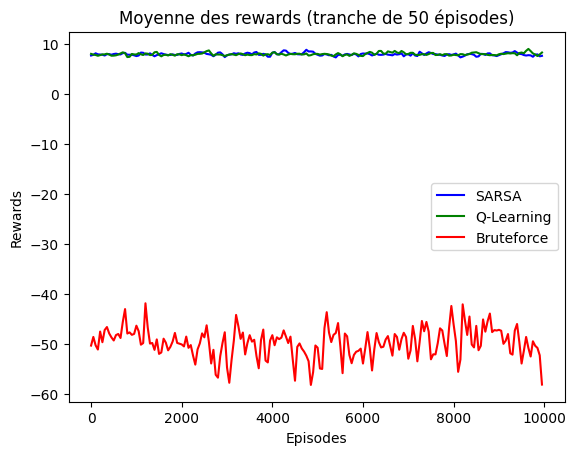

In [6]:
plt.plot(np.arange(0, len(dataSarsa.rewards), MEAN_EVERY_N_EPISODES), meanRewardsSarsa, label='SARSA', color='blue')
plt.plot(np.arange(0, len(dataQl.rewards), MEAN_EVERY_N_EPISODES), meanRewardsQl, label='Q-Learning', color='green')
plt.plot(np.arange(0, len(dataBf.rewards), MEAN_EVERY_N_EPISODES), meanRewardsBf, label='Bruteforce', color='red')

plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.legend()
plt.title("Moyenne des rewards (tranche de " + str(MEAN_EVERY_N_EPISODES) + " épisodes)")

plt.show()

### Pénalités

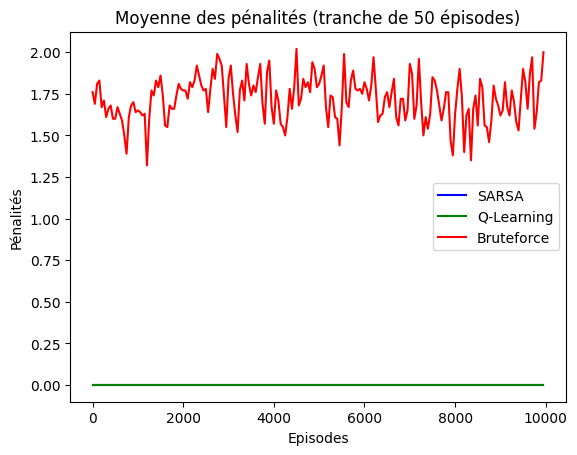

In [7]:
plt.plot(np.arange(0, len(dataSarsa.rewards), MEAN_EVERY_N_EPISODES), meanPenaltiesSarsa, label='SARSA', color='blue')
plt.plot(np.arange(0, len(dataQl.rewards), MEAN_EVERY_N_EPISODES), meanPenaltiesQl, label='Q-Learning', color='green')
plt.plot(np.arange(0, len(dataBf.rewards), MEAN_EVERY_N_EPISODES), meanPenaltiesBf, label='Bruteforce', color='red')

plt.xlabel("Episodes")
plt.ylabel("Pénalités")
plt.legend()
plt.title("Moyenne des pénalités (tranche de " + str(MEAN_EVERY_N_EPISODES) + " épisodes)")

plt.show()

### Steps

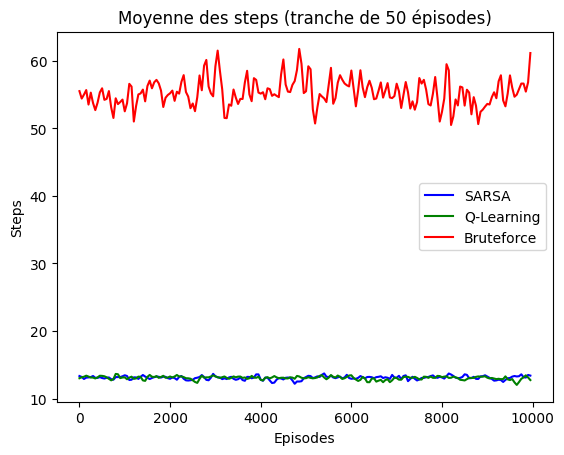

In [8]:
plt.plot(np.arange(0, len(dataSarsa.rewards), MEAN_EVERY_N_EPISODES), meanStepsSarsa, label='SARSA', color='blue')
plt.plot(np.arange(0, len(dataQl.rewards), MEAN_EVERY_N_EPISODES), meanStepsQl, label='Q-Learning', color='green')
plt.plot(np.arange(0, len(dataBf.rewards), MEAN_EVERY_N_EPISODES), meanStepsBf, label='Bruteforce', color='red')

plt.xlabel("Episodes")
plt.ylabel("Steps")
plt.legend()
plt.title("Moyenne des steps (tranche de " + str(MEAN_EVERY_N_EPISODES) + " épisodes)")

plt.show()

### Taux de réussite

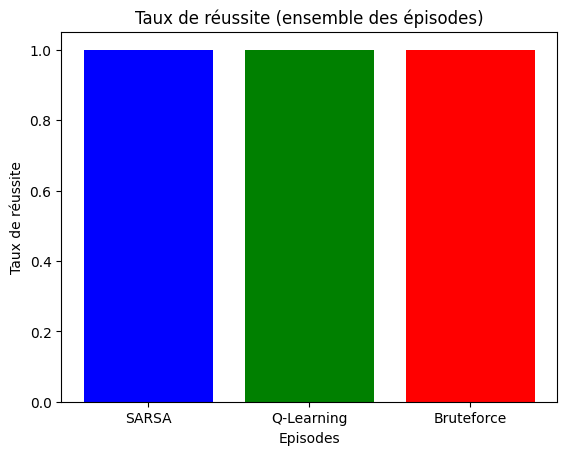

In [9]:
# Affiche les solvedRate cote à cote avec les couleurs correspondantes
plt.bar(['SARSA', 'Q-Learning', 'Bruteforce'], [solvedRateSarsa, solvedRateQl, solvedRateBf], color=['blue', 'green', 'red'])

plt.xlabel("Episodes")
plt.ylabel("Taux de réussite")
plt.title("Taux de réussite (ensemble des épisodes)")

plt.show()